In [4]:
# TensorFlow 2.0.0 is required for this code to work.
# Uncomment and run the following line to install the CPU version.
!pip install tensorflow==2.0.0-beta0 --ignore-installed

  Using cached https://files.pythonhosted.org/packages/cf/a2/b754273c8d9650011712cd5542d179feccfb69ceb492d23f61ab190bada4/tensorflow-2.0.0b0-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d0/33/376510eb8d6246f3c30545f416b2263eee461e40940c2a4413c711bdf62d/google_pasta-0.1.7-py3-none-any.whl
    100% |████████████████████████████████| 15.0MB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 2.0MB 3.7MB/s ta 0:00:011
    100% |████████████████████████████████| 1.4MB 4.7MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a4/96/571b875cd81dda9d5dfa1422a4f9d749e67c0a8d4f4f0b33a4e5f5f35e27/tb_nightly-1.14.0

### Import necessary modules:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import shuffle
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from functools import reduce
import os
import json
from PIL import Image

### Get a list of all hashtags

In [6]:
json_file_names = os.listdir('json_files')
# Remove the 5 char .json file ending to isolate hashtag name
hashtags = [hashtag[:-5] for hashtag in json_file_names]

In [7]:
hashtag_dfs = []
for hashtag in hashtags: 
    hashtag_dfs.append(pd.read_json(f'json_files/{hashtag}.json'))
df = reduce(lambda x, y: pd.concat([x, y]), hashtag_dfs)

In [8]:
full_list = pd.DataFrame.reset_index(df, drop=True)

In [13]:
# wedding hashtag has null values!!

full_list.head(50)

hashtags  \
0   [#foodie, #dinner, #healthyfood, #cooking, #de...   
1   [#modellife, #quoteoftheday, #beverlyhills, #k...   
2   [#alphalete, #Physiquefreak, #Fitness, #Roadto...   
3   [#dreamscape, #iphoneonly, #webstagram, #eyesg...   
4   [#workhard, #melone, #trainmean, #germany, #ma...   
5   [#healthyfood, #healthyeating, #rawvegan, #ket...   
6   [#gymmotivation, #training, #fitlife, #miami, ...   
7   [#keepcalm, #luzpr, #praiana, #barradatijuca, ...   
8   [#loveyourself, #lipodema, #gymchampsportswear...   
9   [#sunset, #life, #beauty, #nofilter, #igers, #...   
10  [#leostronda, #integraltv, #nopainnogame, #mon...   
11                    [#exercise, #workout, #Fitness]   
12  [#ambassador, #energy, #lit, #modelsearch, #be...   
13  [#bodypower, #training, #personaltrainers, #fi...   
14  [#body, #ootd, #longhairdontcare, #wiosna, #gy...   
15                                                 []   
16  [#fun, #beautiful, #instalike, #lfl, #life, #b...   
17  [#beautiful, #ootd, #life, #beauty, #followme,...   
18  [#strongman, #fitspo, #powerlifting, #deadlift...   
19                                                 []   
20  [#seductive, #freedomtoexpress, #riseabovehate...   
21  [#foodie, #yesfit, #veteran, #fitness, #sparta...   
22  [#planche, #handstand, #myself, #oltreipropril...   
23  [#omg, #sogood, #athomefitness, #lovelife, #ea...   
24  [#inst, #muscle, #gymmotivation, #love, #picof...   
25  [#sunset, #sweet, #iphoneonly, #beauty, #topta...   
26  [#healthyfood, #gymmotivation, #training, #lov...   
27  [#foodie, #dinner, #muscle, #gymmotivation, #p...   
28  [#emagrecimento, #mamaefitness, #maede, #gymli...   
29  [#motivation, #gymlife, #fitness, #keeponpushi...   
30  [#healing, #selfcare, #spirituality, #awarenes...   
31  [#outdoors, #visittally, #ihearttally, #local,...   
32  [#training, #loveyourself, #running, #run, #ab...   
33  [#emagrecimento, #alimenta, #Instagramdemae, #...   
34  [#addictedtothegym, #traininsane, #ilovethegym...   
35  [#envigado, #antioquia, #manizales, #cucuta, #...   
36  [#subscribers, #top, #memes, #funnymemes, #you...   
37  [#session, #ootd, #makija, #instaboy, #stylist...   
38  [#businessman, #inspiration, #urbanceo, #life,...   
39  [#fitgirls, #gymmotivation, #instalove, #gymli...   
40  [#inspiration, #blind, #gymmotivation, #workou...   
41  [#fitgirlphotochallenge, #weightloss, #healthy...   
42  [#instamood, #repost, #smile, #igers, #summer,...   
43                                                 []   
44  [#StrengthTraining, #SpeedAndAgility, #William...   
45      [#fitlifestyle, #legsday, #muscles, #fitness]   
46  [#kickboxing, #crossfitMG, #muaythaifighter, #...   
47  [#sunset, #sweet, #iphoneonly, #beauty, #topta...   
48  [#trainhard, #training, #train, #fitnessboutiq...   
49  [#beatyourfuckingschweinehund, #workhard, #fit...   

                                                image  \
0   https://scontent-lga3-1.cdninstagram.com/vp/28...   
1   https://scontent-lga3-1.cdninstagram.com/vp/54...   
2   https://scontent-lga3-1.cdninstagram.com/vp/e6...   
3   https://scontent-lga3-1.cdninstagram.com/vp/99...   
4   https://scontent-lga3-1.cdninstagram.com/vp/2f...   
5   https://scontent-lga3-1.cdninstagram.com/vp/26...   
6   https://scontent-lga3-1.cdninstagram.com/vp/7b...   
7   https://scontent-lga3-1.cdninstagram.com/vp/e6...   
8   https://scontent-lga3-1.cdninstagram.com/vp/f1...   
9   https://scontent-lga3-1.cdninstagram.com/vp/c7...   
10  https://scontent-lga3-1.cdninstagram.com/vp/d2...   
11  https://scontent-lga3-1.cdninstagram.com/vp/3e...   
12  https://scontent-lga3-1.cdninstagram.com/vp/d0...   
13  https://scontent-lga3-1.cdninstagram.com/vp/5e...   
14  https://scontent-lga3-1.cdninstagram.com/vp/0d...   
15  https://scontent-lga3-1.cdninstagram.com/vp/05...   
16  https://scontent-lga3-1.cdninstagram.com/vp/b5...   
17  https://scontent-lga3-1.cdninstagram.com/vp/68...   
18  https://scontent-lga3-1.cdninstagram.com/vp/08... 

### Resizing image to be used in tensorflow framework for Deep Feature Extraction

In [6]:
img_size = 160 # All images will be resized to 160x160
img_shape = (160, 160, 3)

def prepare_image(img_path, height=img_size, width=img_size):
    """Downsample and scale image to prepare it for neural network"""
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.cast(img, tf.float32)
    img = (img/127.5) - 1
    img = tf.image.resize(img, (height, width))
    # Reshape B&W images to match dimensions of color images
    if img.shape != (160, 160, 3):
        img = tf.concat([img, img, img], axis=2)
    return img

In [7]:
pics = []
for i, row in full_list.iterrows():
    name = row['image_local_name']
    hashtag = row['search_hashtag']
    img_path = f'data/{hashtag}/{name}'
    try:
        img = prepare_image(img_path)
        pics.append({'pic': img, 'hashtag': hashtag, 'name': name})
    except:
        # If a file in the list isn't in 
        # storage, skip it and continue
        pass

In [8]:
type(pics[64]['pic'])

tensorflow.python.framework.ops.EagerTensor

W0725 15:01:18.037371 4656661952 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


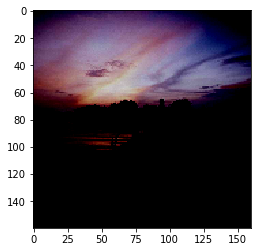

In [9]:
plt.imshow(pics[64]['pic']);

In [10]:
# Create the base model from the pre-trained model MobileNet V2
base_model = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

neural_network = tf.keras.Sequential([
  base_model,
  global_average_layer,
])

In [11]:
def extract_features(image_dict):
    """Return a vector of 1280 deep features for image."""
    image = image_dict['pic']
    image_np = image.numpy()
    images_np = np.expand_dims(image_np, axis=0)
    image_np.shape, images_np.shape
    deep_features = neural_network.predict(images_np)
    image_dict['deep_features'] = deep_features[0]
    return image_dict

In [12]:
deep_features = list(map(extract_features, pics))

In [13]:
type(deep_features)

list

In [14]:
shuffle(deep_features)
train_size = int(len(deep_features) * .7)
train, test = deep_features[:train_size], deep_features[train_size:]

In [15]:
train[0]

{'pic': <tf.Tensor: id=11592, shape=(160, 160, 3), dtype=float32, numpy=
 array([[[ 0.70392156, -0.0745098 , -0.2588235 ],
         [ 0.72352946,  0.02941182, -0.18235293],
         [ 0.7019608 ,  0.05882359, -0.1745098 ],
         ...,
         [ 0.73921573,  0.34901965, -0.02745096],
         [ 0.7117647 ,  0.27450985, -0.0745098 ],
         [ 0.05686279, -0.5470588 , -0.8568628 ]],
 
        [[ 0.33333337, -0.58431375, -0.8156863 ],
         [ 0.60784316, -0.23137254, -0.45686275],
         [ 0.68235296, -0.05098039, -0.29215685],
         ...,
         [ 0.21568632, -0.3705882 , -0.6960784 ],
         [ 0.35294122, -0.2862745 , -0.5803922 ],
         [ 0.7078432 ,  0.10588239, -0.22549018]],
 
        [[ 0.32352945, -0.6450981 , -0.87647057],
         [ 0.2431373 , -0.6647059 , -0.8901961 ],
         [ 0.5235294 , -0.272549  , -0.5       ],
         ...,
         [-0.03333332, -0.6960784 , -0.9647059 ],
         [ 0.2568628 , -0.46470588, -0.70000005],
         [ 0.4666667 , -0.129

In [16]:
train[0].keys()

dict_keys(['pic', 'hashtag', 'name', 'deep_features'])

In [17]:
pic = train[0]

W0725 15:06:11.507791 4656661952 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


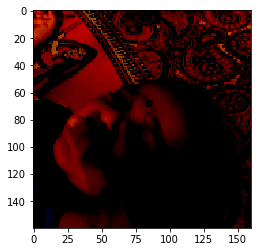

In [18]:
plt.imshow(pic['pic']);

In [19]:
pic['hashtag']

'babies'

In [20]:
pic['deep_features'].shape

(1280,)

In [21]:
pic['pic'].shape

TensorShape([160, 160, 3])

In [22]:
df = pd.DataFrame(deep_features)

In [23]:
df.head()

deep_features  hashtag  \
0  [2.2193785, 0.1846841, 0.9348104, 0.015347958,...   babies   
1  [0.49179092, 0.0, 0.7123833, 0.0, 0.25765607, ...   travel   
2  [0.0, 0.6780646, 0.0, 0.0, 1.1511155, 0.443687...     food   
3  [0.0, 1.6623932, 0.2608316, 0.38453564, 0.4322...   travel   
4  [0.64541465, 1.4916105, 0.28248668, 0.0, 0.0, ...  animals   

                                       name  \
0  c408b61a-7986-4cfb-878b-4fc9dda16108.jpg   
1  b6316377-299c-4f5a-b17e-c7879dce5220.jpg   
2  6bd88a68-95ba-41a0-9f92-b0ecc8d27b26.jpg   
3  e41dda23-d612-42a2-937b-e5520e1aeacf.jpg   
4  8b1dda25-42df-4129-a053-f6eabeff6202.jpg   

                                                 pic  
0  (((tf.Tensor(0.70392156, shape=(), dtype=float...  
1  (((tf.Tensor(-0.37843138, shape=(), dtype=floa...  
2  (((tf.Tensor(0.28627455, shape=(), dtype=float...  
3  (((tf.Tensor(0.20133343, shape=(), dtype=float...  
4  (((tf.Tensor(-0.42745095, shape=(), dtype=floa...

In [25]:
df.to_pickle("df_deep_features.pkl")

In [76]:
#df.to_csv('deep_features.csv')

## ALS Model

In [37]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS, ALSModel

In [38]:
spark = SparkSession.builder.master('local').getOrCreate()

In [79]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_list, test_size=0.2)

In [81]:
train.head()

hashtags  \
558                                                  []   
107   [#son, #az, #paradigm, #affiliate, #fitness, #...   
1528  [#JDM, #fastandfurious, #Han, #automechanic, #...   
777   [#thoreau, #fog, #travel, #lake, #photography,...   
1787  [#bmwfanatics, #low, #austria, #carphotography...   

                                                  image  \
558   https://scontent-sea1-1.cdninstagram.com/vp/42...   
107   https://scontent-lga3-1.cdninstagram.com/vp/cc...   
1528  https://scontent-lga3-1.cdninstagram.com/vp/e6...   
777   https://scontent-lga3-1.cdninstagram.com/vp/3c...   
1787  https://scontent-lga3-1.cdninstagram.com/vp/8a...   

                              image_local_name  \
558   ea922ae5-1e2c-4e9e-aaea-2308927960d1.jpg   
107   00d773ed-4628-418c-9927-31330067b2a8.jpg   
1528  4844be8e-8117-4b18-bac4-baa0a8da1bc2.jpg   
777   876b3ae9-e8b5-48eb-85d0-7902f07d0db4.jpg   
1787  a2668d9e-fed6-47e0-90d7-0a78361682a9.jpg   

                                     post_link search_hashtag  \
558   https://www.instagram.com/p/By4Aut_Ap0X/         selfie   
107   https://www.instagram.com/p/By5jlVPnMh2/        fitness   
1528  https://www.instagram.com/p/By50GzVAAAC/           cars   
777   https://www.instagram.com/p/By263uUgmJZ/         travel   
1787  https://www.instagram.com/p/By5zaqkIHMZ/           cars   

                                         clean_hashtags  
558                                                  []  
107   [#son, #az, #paradigm, #affiliate, #fitness, #...  
1528  [#JDM, #fastandfurious, #Han, #automechanic, #...  
777   [#thoreau, #fog, #travel, #lake, #photography,...  
1787  [#bmwfanatics, #low, #austria, #carphotography...

In [83]:
len(train)

2400

In [85]:
#full_list.head()

In [28]:
full_list['clean_hashtags'] = full_list['hashtags'].apply(
    lambda hashtag_list: [h for h in hashtag_list if h.startswith('#')])

In [43]:
image_lookup = dict(zip(full_list['image_local_name'], full_list.index))

In [29]:
all_hashtags = set()
for tags in full_list['clean_hashtags']:
    all_hashtags.update(tags)
hashtag_lookup = {hashtag: i for i, hashtag in enumerate(all_hashtags)}

In [45]:
hashtag_data = []
for i in full_list.index:
    hashtags = full_list.loc[i, 'clean_hashtags']
    for hashtag in hashtags:
        hashtag_data.append(
            {'image_id': i,
             'hashtag_id': hashtag_lookup[hashtag],
             'rating': 1}
        )
hashtag_df_long = pd.DataFrame(hashtag_data)

In [46]:
hashtag_df_long.tail()

hashtag_id  image_id  rating
36041        5071      2699       1
36042         658      2699       1
36043       10699      2699       1
36044       10823      2699       1
36045         486      2699       1

In [47]:
full_list.dtypes

hashtags            object
image               object
image_local_name    object
post_link           object
search_hashtag      object
clean_hashtags      object
dtype: object

In [48]:
als = ALS(userCol='image_id',
          itemCol='hashtag_id',
          implicitPrefs=True,
          alpha=40)

In [49]:
hashtag_spark_df = spark.createDataFrame(hashtag_df_long)

In [ ]:
als_model = als.fit(hashtag_spark_df)

In [68]:
als_model.save('als')

In [50]:
#load the model
#ALSModel model = ALSModel.load(“/path/to/read/the/model/from”)

In [ ]:
recs = als_model.recommendForAllUsers(numItems=10).toPandas()

In [77]:
len(recs)

1658

In [52]:
hashtag_index = list(all_hashtags)

In [53]:
def lookup_hashtag(hashtag_id):
    return hashtag_index[hashtag_id]

In [54]:
def lookup_hashtag_recs(rec_scores):
    return [lookup_hashtag(rec) for (rec, score) in rec_scores]

In [55]:
recs['recommended_hashtags'] = recs['recommendations'].apply(lookup_hashtag_recs)

In [56]:
recs.index = recs['image_id']

In [57]:
compare_recs = recs.join(full_list, how='left')[['recommendations',
                                                 'recommended_hashtags',
                                                 'hashtags',
                                                 'image_local_name',
                                                 'search_hashtag']]

In [ ]:
compare_recs.loc[0, 'image_local_name']

In [87]:
compare_recs.to_pickle('recs.pkl')

In [58]:
compare_recs.drop('recommendations', axis=1)

recommended_hashtags  \
image_id                                                      
1580      [#jdm, #car, #cars, #carporn, #carlifestyle, #...   
1591      [#cars, #car, #auto, #bmw, #audi, #toyota, #me...   
463       [#follow, #like, #selfie, #instagood, #food, #...   
833       [#art, #foodie, #architecture, #summer, #photo...   
1645      [#cars, #car, #auto, #bmw, #toyota, #jdm, #mer...   
1829      [#food, #foodie, #instafood, #foodporn, #yummy...   
1959      [#foodporn, #foodie, #instafood, #foodstagram,...   
2659      [#pets, #animals, #animal, #pet, #dogstagram, ...   
540       [#selfie, #ootd, #daily, #selca, #repost, #ins...   
1990      [#follow, #like, #followme, #instadaily, #inst...   
2580      [#pet, #cat, #pets, #dogs, #petstagram, #cats,...   
1721      [#cars, #luxury, #car, #like, #instagram, #fol...   
392       [#f, #art, #fun, #selfie, #repost, #cute, #fri...   
1522      [#cars, #photography, #travel, #love, #instagr...   
243       [#positivevibes, #dance, #meditation, #selflov...   
623       [#travel, #summer, #italy, #photooftheday, #lo...   
2563      [#instagood, #photooftheday, #love, #instagram...   
1896      [#food, #foodie, #foodporn, #instafood, #fitne...   
737       [#travel, #photography, #love, #instagood, #li...   
897       [#travel, #summer, #nature, #photography, #pho...   
1507      [#car, #carporn, #cars, #carlifestyle, #bmw, #...   
1650      [#cars, #auto, #car, #bmw, #luxury, #f, #merce...   
31        [#fitness, #lifestyle, #motivation, #health, #...   
2572      [#animals, #dog, #pets, #animal, #cute, #pet, ...   
1903      [#food, #instagood, #follow, #like, #love, #in...   
1618      [#cars, #car, #auto, #carlifestyle, #carsofins...   
1699      [#cars, #a, #toyota, #news, #instapic, #draw, ...   
580       [#instagood, #love, #selfie, #photooftheday, #...   
251       [#travel, #nature, #photography, #lifestyle, #...   
451       [#nature, #photooftheday, #photo, #cute, #inst...   
...                                                     ...   
1857      [#fitness, #health, #foodie, #healthylifestyle...   
2417      [#animals, #nature, #photography, #dance, #spi...   
878       [#travel, #instatravel, #travelphotography, #t...   
521       [#f, #art, #fun, #selfie, #repost, #cute, #fri...   
2643      [#Animals, #selfie, #animals, #Kittens, #Insta...   
788       [#summer, #photography, #art, #travel, #amazin...   
2690      [#animals, #pets, #instagood, #pet, #dogs, #do...   
701       [#travel, #photo, #fashion, #style, #picofthed...   
2021      [#selfie, #follow, #instagood, #like, #instali...   
617       [#explore, #travel, #travelgram, #repost, #blo...   
2599      [#animals, #pets, #animal, #dogs, #dog, #natur...   
2511      [#animals, #pets, #animal, #dog, #pet, #dogs, ...   
1882      [#foodporn, #instafood, #yummy, #dinner, #food...   
1993      [#instalike, #followme, #follow, #like, #likef...   
2454      [#animals, #nature, #cute, #photooftheday, #in...   
315       [#selfie, #daily, #ootd, #selca, #l, #follow, ...   
36        [#repost, #cars, #food, #fashion, #art, #summe...   
1656      [#auto, #bmw, #cars, #car, #instacar, #carporn...   
2086      [#food, #friends, #picoftheday, #art, #instafo...   
187       [#training, #workout, #fitnessmotivation, #fit...   
2057      [#instagood, #selfie, #follow, #like, #cute, #...   
208       [#fitness, #motivation, #lifestyle, #gym, #hea...   
2558      [#animals, #pets, #pet, #cat, #cute, #dogs, #a...   
401       [#selfie, #love, #instagood, #food, #follow, #...   
422       [#selfie, #daily, #follow, #instagood, #like, ...   
2555      [#love, #art, #photooftheday, #instagood, #pic...   
517       [#selfie, #love, #instagood, #food, #follow, #...   
2457      [#animals, #dog, #pets, #animal, #dogs, #pet, ...   
2487      [#love, #nature, #photography, #instagood, #ph...   
89        [#instagood, #food, #follow, #like, #selfie, #...   

                                                   hashtags  \
image_

In [59]:
image_factors = als_model.userFactors.toPandas()

In [60]:
image_factors.index = image_factors['id']

In [61]:
compare_recs.join(image_factors)

recommendations  \
image_id                                                      
1580      [(11307, 1.089327335357666), (2452, 1.07650852...   
1591      [(3212, 0.7940346598625183), (2452, 0.66501080...   
463       [(4811, 0.959574818611145), (8661, 0.927076160...   
833       [(2304, 0.918540358543396), (6029, 0.788918375...   
1645      [(3212, 0.719140350818634), (2452, 0.540755271...   
1829      [(4068, 0.7660794258117676), (6029, 0.61289584...   
1959      [(745, 1.0295597314834595), (6029, 1.029177784...   
2659      [(2771, 0.8910551071166992), (7418, 0.86865395...   
540       [(10993, 0.6358941197395325), (3756, 0.5160882...   
1990      [(4811, 0.9960041046142578), (8661, 0.98882216...   
2580      [(7511, 1.057223916053772), (10520, 1.04700076...   
1721      [(3212, 1.089688777923584), (11110, 0.98979473...   
392       [(9600, 1.226271629333496), (2304, 1.103211641...   
1522      [(3212, 0.7206841111183167), (2315, 0.68646520...   
243       [(1553, 1.0287142992019653), (8625, 0.96964538...   
623       [(3066, 1.1683529615402222), (5032, 1.01658630...   
2563      [(6680, 0.898478627204895), (519, 0.8713511824...   
1896      [(4068, 0.5801108479499817), (6029, 0.40150538...   
737       [(3066, 0.5089393854141235), (2315, 0.49238386...   
897       [(3066, 1.1746629476547241), (5032, 1.04039466...   
1507      [(2452, 1.02311372756958), (1807, 0.9683511257...   
1650      [(3212, 0.8123443126678467), (144, 0.730548739...   
31        [(6079, 1.1391621828079224), (8785, 0.97329747...   
2572      [(7418, 1.0185444355010986), (8422, 0.98769009...   
1903      [(4068, 1.0673370361328125), (6680, 0.88220661...   
1618      [(3212, 0.7490907907485962), (2452, 0.60325056...   
1699      [(3212, 0.8324836492538452), (5096, 0.68694794...   
580       [(6680, 1.0452332496643066), (4029, 1.02902197...   
251       [(3066, 1.265234112739563), (7311, 1.055379152...   
451       [(7311, 1.300225853919983), (519, 1.1806565523...   
...                                                     ...   
1857      [(6079, 1.1700365543365479), (1213, 1.10802388...   
2417      [(7418, 1.071725845336914), (7311, 0.942989885...   
878       [(3066, 1.0731310844421387), (9630, 1.00915527...   
521       [(9600, 1.226271629333496), (2304, 1.103211641...   
2643      [(1196, 0.8183364272117615), (10993, 0.8148465...   
788       [(5032, 1.0711095333099365), (2315, 1.05700373...   
2690      [(7418, 1.1280781030654907), (2771, 1.03738439...   
701       [(3066, 1.114786982536316), (4922, 1.074362158...   
2021      [(10993, 1.0126879215240479), (4811, 0.9813246...   
617       [(6950, 1.0187019109725952), (3066, 0.89717155...   
2599      [(7418, 1.1398334503173828), (2771, 1.07153129...   
2511      [(7418, 1.0431122779846191), (2771, 1.00754213...   
1882      [(745, 1.1334543228149414), (72, 1.12040138244...   
1993      [(10563, 1.0198466777801514), (3729, 1.0170032...   
2454      [(7418, 1.0950024127960205), (7311, 1.08677458...   
315       [(10993, 0.8931050896644592), (7184, 0.7868613...   
36        [(4462, 1.1184018850326538), (3212, 1.05986535...   
1656      [(144, 1.1639907360076904), (1032, 1.030647039...   
2086      [(4068, 1.1894150972366333), (8738, 1.06038832...   
187       [(10518, 1.07766854763031), (6431, 1.076055526...   
2057      [(6680, 1.0312694311141968), (10993, 1.0284775...   
208       [(6079, 1.1995152235031128), (248, 1.077876329...   
2558      [(7418, 1.0700242519378662), (2771, 1.02310609...   
401       [(10993, 1.0819181203842163), (4029, 1.0621154...   
422       [(10993, 0.9443678259849548), (7184, 0.8338791...   
2555      [(4029, 1.213152289390564), (2304, 1.211663007...   
517       [(10993, 1.0819181203842163), (4029, 1.0621154...   
2457      [(7418, 1.0214154720306396), (8422, 1.00217652...   
2487      [(4029, 0.8039029836654663), (7311, 0.79346960...   
89        [(6680, 1.0267730951309204), (4068, 1.02152919...   

                                       recommended_hashtags  \
image_id   

### Pickle hashtag data

In [30]:
hashtag_lookup

{'#francecars': 0,
 '#AUDIBESTPICTURE': 1,
 '#tattoostyle': 2,
 '#cakes': 3,
 '#hotwheelscollector': 4,
 '#treino': 5,
 '#sleepy': 6,
 '#philandlil': 7,
 '#mycars': 8,
 '#pawsome': 9,
 '#nashvillestrong': 10,
 '#laughs': 11,
 '#quattroworld': 12,
 '#katzenfotografie': 13,
 '#myth': 14,
 '#adoptanocompres': 15,
 '#capriitaly': 16,
 '#cotedazur': 17,
 '#boxinglab': 18,
 '#japanenetabby': 19,
 '#wealth': 20,
 '#Pet': 21,
 '#shorts': 22,
 '#earthcapture': 23,
 '#rallylife': 24,
 '#backstage': 25,
 '#burbank': 26,
 '#entrenaencasa': 27,
 '#us': 28,
 '#VhJB': 29,
 '#sunset': 30,
 '#koreanstyle': 31,
 '#dronephotography': 32,
 '#be': 33,
 '#berries': 34,
 '#subarulovers': 35,
 '#cutesheis': 36,
 '#banhoetosa': 37,
 '#rawvegan': 38,
 '#adobe': 39,
 '#offensive': 40,
 '#yes': 41,
 '#gidicars': 42,
 '#kitties': 43,
 '#dark': 44,
 '#Spotters': 45,
 '#chicken': 46,
 '#path': 47,
 '#fashiondiaries': 48,
 '#losingweight': 49,
 '#coldbloodedpets': 50,
 '#diamondback': 51,
 '#dragonballz': 52,
 '#bari

In [50]:
hashtags_df = pd.DataFrame.from_dict(hashtag_lookup, orient='index')
hashtags_df.head()

0
#francecars          0
#AUDIBESTPICTURE     1
#tattoostyle         2
#cakes               3
#hotwheelscollector  4

In [ ]:
hashtags_df = hashtags_df.reset_index()
hashtags_df.columns = ['hashtag', 'id']

In [53]:
hashtags_df.index = hashtags_df['id']

In [55]:
hashtags_df = hashtags_df.drop('id', axis=1)

In [57]:
hashtags_df.head()

hashtag
id                     
0           #francecars
1      #AUDIBESTPICTURE
2          #tattoostyle
3                #cakes
4   #hotwheelscollector

In [58]:
hashtags_df.to_pickle("hashtags_df.pkl")